# 概率分布
关于概览分布的基本概念就不赘述了。虽然统计中的分布非常多，但是常见的有五种：二项分布，正态分布，$t$分布，$\chi ^2$分布以及$F$分布。下面介绍几种基本的分布在R中的实现。  

|   |  二项分布  | 正态分布  |$t$分布|$\chi ^2$分布|$F$分布
|------|------|------|------|------|------|
|  概览密度  | dbinom()|dnorm() |dt() |dchisq() |df() |
|  累积分布  | pbinom()|pnorm() |pt() |pchisq() |pf() |
|  随机数  | rbinom()|rnorm() |rt() |rchisq() |rf() |
|  分位数  | qbinom()|qnorm() |qt() |qchisq() |qf() |

# 统计估计
## 点估计
给定一列观测值$x_1,x_2,\cdots ,x_n$，其似然函数$L$为：
$$L(\theta) = \prod_{i=1}^{n}f(x_i|\theta)$$
最大似然估计的思路是已经知道样本的分布和观察结果，然后根据结果来反推能最大概率满足该结果的分布的参数。

In [6]:
data("mtcars")
x = mtcars$am
L <- function(p, x) prod(dbinom(x, size = 1, prob = p))
optimize(L, interval = c(0, 1), x = x, maximum = TRUE)

$maximum
[1] 0.4062458

$objective
[1] 4.099989e-10

在实践中，为了计算方便，往往对似然函数的对数函数进行优化：
$$-l(p)=-\sum x_i\ln p-(n-\sum x_i)\ln(1-p)$$

In [8]:
data("mtcars")
x = mtcars$am
minuslogL <- function(p, x) -sum(dbinom(x, size = 1, prob = p,log=TRUE))
optimize(minuslogL,interval = c(0, 1), x = x)

$minimum
[1] 0.4062525

$objective
[1] 21.61487

In [ ]:
对于多参数的最大似然估计，使用stats4包的mle函数

In [9]:
minuslogL = function(mu, sigma2) {
  -sum(dnorm(x, mean = mu, sd = sqrt(sigma2), log = TRUE))}
x = PlantGrowth$weight

library(stats4)
MaxLikeEst = mle(minuslogL, start = list(mu = 5, sigma2 = 0.5))
summary(MaxLikeEst)

Warning message:
In sqrt(sigma2): 产生了NaNsWarning message:
In sqrt(sigma2): 产生了NaNs

Maximum likelihood estimation

Call:
mle(minuslogl = minuslogL, start = list(mu = 5, sigma2 = 0.5))

Coefficients:
        Estimate Std. Error
mu     5.0729848  0.1258666
sigma2 0.4752721  0.1227108

-2 log L: 62.82084 

## 区间估计
### 均值的区间估计


Warning message:
: package 'TeachingDemos' was built under R version 3.2.3Warning message:
: package 'IPSUR' was built under R version 3.2.3Loading required package: HH
Warning message:
: package 'HH' was built under R version 3.2.3Loading required package: lattice
Loading required package: grid
Loading required package: latticeExtra
Loading required package: RColorBrewer
Loading required package: multcomp
Warning message:
: package 'multcomp' was built under R version 3.2.3Loading required package: mvtnorm
Warning message:
: package 'mvtnorm' was built under R version 3.2.3Loading required package: survival
Loading required package: TH.data
Warning message:
: package 'TH.data' was built under R version 3.2.3Loading required package: gridExtra


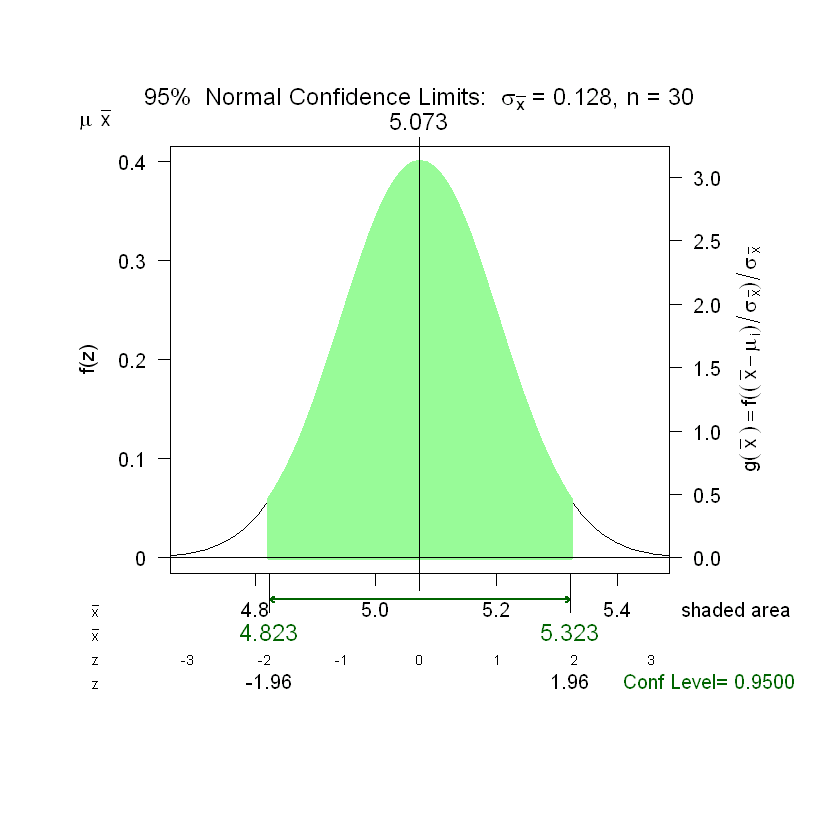

In [2]:
library(TeachingDemos)
library(IPSUR)
data(PlantGrowth)
temp <- with(PlantGrowth, z.test(weight, stdev = 0.7))
plot(temp, "Conf")